In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
data_user = pd.read_csv(r'H:\python案例分析，淘宝\tianchi_mobile_recommend_train_user.csv')
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [3]:
#缺失值处理
missingTotal=data_user.isnull().sum()
missingExist=missingTotal[missingTotal>0]
missingExist = missingExist.sort_values(ascending=False)
#sort_values按照某一列的大小进行排序，ascending：默认True升序排列；False降序排列

In [4]:
print(missingExist)

user_geohash    8334824
dtype: int64


In [5]:
print(missingTotal)

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64


In [6]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [7]:
#一致化处理
import re
#拆分数据集
data_user['date']=data_user['time'].map(lambda s:re.compile(' ').split(s)[0])#问题 S是哪里来的

In [8]:
data_user['hour']=data_user['time'].map(lambda s:re.compile(' ').split(s)[1])
#lambda只是一个表达式，没有函数体，lambda arg1,arg2,arg3,……:expression
#arg1,arg2,arg3表示具体的参数，expression表示参数要执行的操作
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [9]:
#查看data_user数据集数据类型
data_user.dtypes

user_id           int64
item_id           int64
behavior_type     int64
user_geohash     object
item_category     int64
time             object
date             object
hour             object
dtype: object

In [10]:
#发现time列和date列 应该转化为日期数据类型，hour列应该是字符串数据类型，
#数据类型化
data_user['date']=pd.to_datetime(data_user['date'])
data_user['time']=pd.to_datetime(data_user['time'])
data_user['hour']=data_user['hour'].astype('int64')
data_user.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [11]:
#异常值处理
data_user=data_user.sort_values(by='time',ascending=True)
data_user=data_user.reset_index(drop=True)#将原索引删除，不加人columns
data_user.describe()
#利用describe()方法就可以获取所有数值类型字段的分布值
#通过观察数据集的四分位数，总数，平均值，方差等，发现数据集并无异常值存在

,user_id,item_id,behavior_type,item_category,hour
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03,1.481799e+01
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03,6.474778e+00
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03,1.000000e+01
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03,1.600000e+01
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04,2.000000e+01
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2.300000e+01


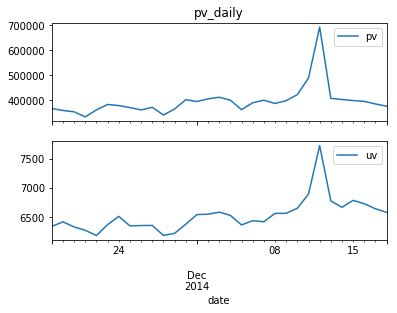

In [14]:
#用户行为分析
#(1)pv和uv分析
#pv(访问量)：即page view,具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次
#uv(独立访客)：即unique visitor 访问您网站的一台电脑客户端为一个访客
#(1)日访问量分析
#pv_daily记录每天用户操作次数，uv_daily记录每天不同的上线用户数量
from matplotlib import pyplot as plt
pv_daily=data_user.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_daily=data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=axes[0]).set_title('pv_daily')
uv_daily.plot(x='date',y='uv',ax=axes[1])

Text(0.5, 1.0, 'uv_hour')

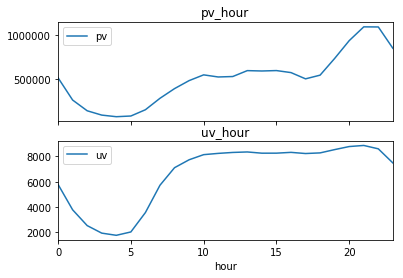

In [15]:
#小时访问量分析#pv_hour记录每小时用户操作次数，uv_hour记录每小时不同的上线用户数量
pv_hour=data_user.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour=data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv',ax=axes[0])
uv_hour.plot(x='hour',y='uv',ax=axes[1])
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')

In [16]:
pv_hour.head()

,hour,pv
0,0,517404
1,1,267682
2,2,147090
3,3,98516
4,4,80487


In [17]:
uv_hour.head()

,hour,uv
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765


Text(0.5, 1.0, 'pv_different_behavior_type_except1')

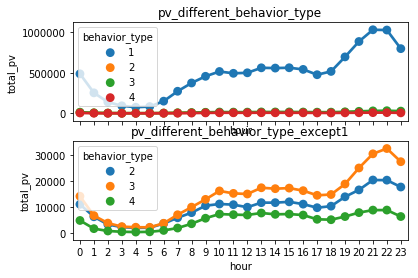

In [18]:
#不同行为类型用户pv分析
pv_detail=data_user.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_pv'})
fig,axes=plt.subplots(2,1,sharex=True)
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail,ax=axes[0])
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail[pv_detail.behavior_type!=1],ax=axes[1])
axes[0].set_title('pv_different_behavior_type')
axes[1].set_title('pv_different_behavior_type_except1')

Text(0.5, 1.0, 'daily_user_buy')

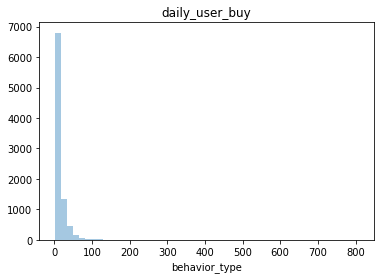

In [20]:
#（1）用户购买次数情况分析
data_user_buy=data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
sns.distplot(data_user_buy,kde=False)
plt.title('daily_user_buy')

Text(0.5, 1.0, 'daily_ARPPU')

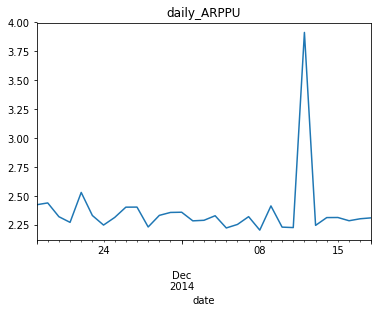

In [22]:
data_use_buy1=data_user[data_user.behavior_type==4].groupby(['date','user_id'])['behavior_type'].count().reset_index().rename(columns={'behavior_type':'total'})
data_use_buy1.groupby('date').apply(lambda x:x.total.sum()/x.total.count()).plot()
plt.title('daily_ARPPU')

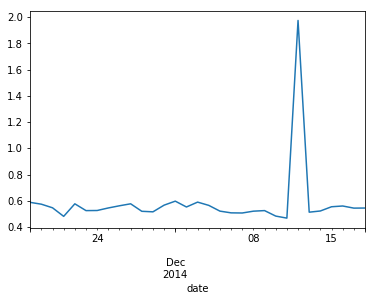

In [23]:
#（3）日ARPU#ARPU(Average Revenue Per User) ：平均每用户收入，可通过 总收入/AU 计算得出。它可以衡量产品的盈利能力和发展活力。#活跃用户数平均消费次数=消费总次数/活跃用户人数(每天有操作行为的为活跃)
data_user['operation']=1
data_use_buy2=data_user.groupby(['date','user_id','behavior_type'])['operation'].count().reset_index().rename(columns={'operation':'total'})
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.sum()/len(x.user_id.unique())).plot()

Text(0.5, 1.0, 'daily_afford_rate')

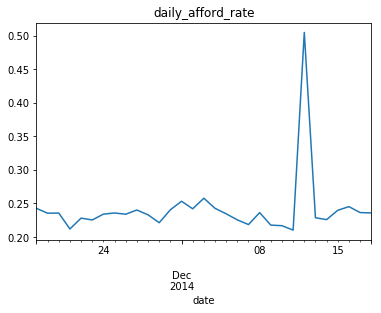

In [24]:
#（4）付费率#付费率=消费人数/活跃用户人数
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.count()/len(x.user_id.unique())).plot()
plt.title('daily_afford_rate')

大多数用户消费：1次


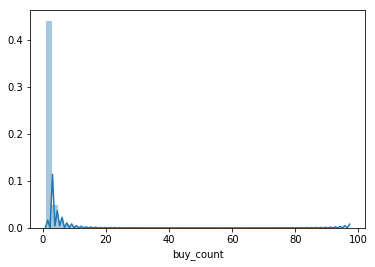

In [25]:
#（5）同一时间段用户消费次数分布
data_user_buy3=data_user[data_user.behavior_type==4].groupby(['user_id','date','hour'])['operation'].sum().rename('buy_count')
sns.distplot(data_user_buy3)
print('大多数用户消费：{}次'.format(data_user_buy3.mode()[0]))

In [26]:
#复购情况，即两天以上有购买行为,一天多次购买算一次#复购率=有复购行为的用户数/有购买行为的用户总数
date_rebuy=data_user[data_user.behavior_type==4].groupby('user_id')['date'].apply(lambda x:len(x.unique())).rename('rebuy_count')
print('复购率:',round(date_rebuy[date_rebuy>=2].count()/date_rebuy.count(),4))

复购率: 0.8717


Text(0, 0.5, 'gap_count')

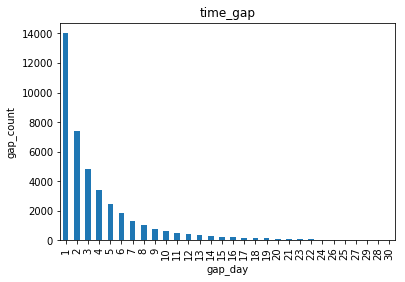

In [29]:
#所有复购时间间隔消费次数分布
data_day_buy=data_user[data_user.behavior_type==4].groupby(['user_id','date']).operation.count().reset_index()
data_user_buy4=data_day_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())
data_user_buy4=data_user_buy4.map(lambda x:x.days).value_counts().plot(kind='bar')
#value_counts()对某些值的出现次数进行计算
plt.title('time_gap')
plt.xlabel('gap_day')
plt.ylabel('gap_count')


In [32]:
data_user_count=data_user.groupby(['behavior_type']).count()
data_user_count.head()


,user_id,item_id,user_geohash,item_category,time,date,hour,operation
behavior_type,,,,,,,,
1,11550581,11550581,3704666,11550581,11550581,11550581,11550581,11550581
2,242556,242556,74365,242556,242556,242556,242556,242556
3,343564,343564,104443,343564,343564,343564,343564,343564
4,120205,120205,38608,120205,120205,120205,120205,120205


In [33]:
pv_all=data_user['user_id'].count()
print(pv_all)

12256906


In [34]:
#十、用户行为与商品种类关系分析#不同用户行为类别的转化率
data_category=data_user[data_user.behavior_type!=2].groupby(['item_category','behavior_type']).operation.count().unstack(1).rename(columns={1:'点击量',3:'加入购物车量',4:'购买量'}).fillna(0)
data_category.head()

behavior_type,点击量,加入购物车量,购买量
item_category,,,
2,3.0,0.0,0.0
3,3.0,0.0,0.0
4,1.0,0.0,0.0
6,10.0,0.0,0.0
8,976.0,4.0,4.0
